# 004.003 EDA - Odds

In [1]:
import pathlib
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import ptitprince as pt

%matplotlib inline

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 2
#add the 'src' directory to path to import modules
PROJECT_DIR = pathlib.Path.cwd().resolve().parent
sys.path.append(str(PROJECT_DIR))

# from src.visualization.visualize import extend_cols

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

fn = '2007-2008__2017-2018.csv'
EDA_FP = PROJECT_DIR / 'data' / 'sample' / '01-stacked-seasons' / 'germany' / 'bundesliga' / fn
SAVED_IMAGES_DIR = PROJECT_DIR / 'notebooks' / 'saved-images'

## Load Sample Data

Sample Data: Bundesliga Seasons 2007-2008 to 2014-2015

In [2]:
df_orig = pd.read_csv(EDA_FP, parse_dates=['date'])
df_orig = df_orig[~df_orig['season'].isin(['2015-2016', '2016-2017', '2017-2018'])]
cols = ['season', 'date', 'h', 'a', 'h_ftGoals', 'a_ftGoals', 'result']
cols.extend([col for col in df_orig.columns if 'Odds' in col and 'asian' not in col  and '2.5' not in col])

df_orig = df_orig[cols].sort_values(by=['date', 'h', 'a']).reset_index(drop=True)
df_orig.head(2)

,season,date,h,a,h_ftGoals,a_ftGoals,result,awinClOddsPinn,awinOddsBbMax,awinOddsBbMean,awinOddsBet365,awinOddsBet365Indatabet,awinOddsBsa,awinOddsBwa,awinOddsGb,awinOddsIw,awinOddsLb,awinOddsPinn,awinOddsPinnIndatabet,awinOddsSb,awinOddsSj,awinOddsVc,awinOddsWh,drawClOddsPinn,drawOddsBbMax,drawOddsBbMean,drawOddsBet365,drawOddsBet365Indatabet,drawOddsBsa,drawOddsBwa,drawOddsGb,drawOddsIw,drawOddsLb,drawOddsPinn,drawOddsPinnIndatabet,drawOddsSb,drawOddsSj,drawOddsVc,drawOddsWh,hwinClOddsPinn,hwinOddsBbMax,hwinOddsBbMean,hwinOddsBet365,hwinOddsBet365Indatabet,hwinOddsBsa,hwinOddsBwa,hwinOddsGb,hwinOddsIw,hwinOddsLb,hwinOddsPinn,hwinOddsPinnIndatabet,hwinOddsSb,hwinOddsSj,hwinOddsVc,hwinOddsWh
0,2007-2008,2007-08-10,stuttgart,schalke,2.0,2.0,draw,NaN,3.2,2.92,2.87,3.0,2.88,2.85,2.9,2.8,3.0,NaN,NaN,2.85,3.0,2.8,NaN,NaN,3.3,3.18,3.25,3.25,3.2,3.20,3.2,3.1,3.2,NaN,NaN,3.25,3.20,3.25,NaN,NaN,2.55,2.30,2.37,2.1,2.2,2.30,2.35,2.3,2.1,NaN,NaN,2.25,2.20,2.25,NaN
1,2007-2008,2007-08-11,bayern-munich,hansa-rostock,3.0,0.0,hwin,NaN,21.0,13.40,19.00,10.0,11.00,12.25,13.0,11.0,11.0,NaN,NaN,11.00,15.0,13.0,NaN,NaN,6.8,5.89,6.00,5.50,5.5,6.75,6.0,5.2,5.0,NaN,NaN,5.75,5.75,6.00,NaN,NaN,1.20,1.18,1.16,1.2,1.2,1.15,1.20,1.2,1.2,NaN,NaN,1.20,1.17,1.14,NaN


In [3]:
df_orig.tail(2)

,season,date,h,a,h_ftGoals,a_ftGoals,result,awinClOddsPinn,awinOddsBbMax,awinOddsBbMean,awinOddsBet365,awinOddsBet365Indatabet,awinOddsBsa,awinOddsBwa,awinOddsGb,awinOddsIw,awinOddsLb,awinOddsPinn,awinOddsPinnIndatabet,awinOddsSb,awinOddsSj,awinOddsVc,awinOddsWh,drawClOddsPinn,drawOddsBbMax,drawOddsBbMean,drawOddsBet365,drawOddsBet365Indatabet,drawOddsBsa,drawOddsBwa,drawOddsGb,drawOddsIw,drawOddsLb,drawOddsPinn,drawOddsPinnIndatabet,drawOddsSb,drawOddsSj,drawOddsVc,drawOddsWh,hwinClOddsPinn,hwinOddsBbMax,hwinOddsBbMean,hwinOddsBet365,hwinOddsBet365Indatabet,hwinOddsBsa,hwinOddsBwa,hwinOddsGb,hwinOddsIw,hwinOddsLb,hwinOddsPinn,hwinOddsPinnIndatabet,hwinOddsSb,hwinOddsSj,hwinOddsVc,hwinOddsWh
2446,2014-2015,2015-05-23,hoffenheim,hertha-berlin,2.0,1.0,hwin,3.68,3.95,3.72,3.90,3.4,NaN,3.50,NaN,3.6,3.60,3.82,3.35,NaN,NaN,3.75,3.8,3.57,3.91,3.60,3.75,3.6,NaN,3.5,NaN,3.3,3.75,3.91,3.72,NaN,NaN,3.6,3.4,2.14,2.0,1.96,1.91,2.05,NaN,2.0,NaN,2.0,2.0,1.99,2.21,NaN,NaN,2.0,2.00
2447,2014-2015,2015-05-23,paderborn,stuttgart,1.0,2.0,awin,2.01,2.15,2.06,2.05,2.1,NaN,2.05,NaN,1.9,2.15,2.14,1.95,NaN,NaN,2.10,2.1,4.13,4.20,3.81,3.80,3.6,NaN,4.0,NaN,3.6,3.75,4.07,4.03,NaN,NaN,4.0,3.6,3.56,3.6,3.23,3.40,3.25,NaN,3.0,NaN,3.6,3.2,3.27,3.85,NaN,NaN,3.3,3.25


In [4]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 55 columns):
season                     2448 non-null object
date                       2448 non-null datetime64[ns]
h                          2448 non-null object
a                          2448 non-null object
h_ftGoals                  2448 non-null float64
a_ftGoals                  2448 non-null float64
result                     2448 non-null object
awinClOddsPinn             918 non-null float64
awinOddsBbMax              2448 non-null float64
awinOddsBbMean             2448 non-null float64
awinOddsBet365             2448 non-null float64
awinOddsBet365Indatabet    2447 non-null float64
awinOddsBsa                1835 non-null float64
awinOddsBwa                2448 non-null float64
awinOddsGb                 1835 non-null float64
awinOddsIw                 2443 non-null float64
awinOddsLb                 2448 non-null float64
awinOddsPinn               918 non-null float64
awinOddsPi

## Odds

Each bookie publishes a set of moneyline odds - these are the 1X2 odds - odds for Home win, Draw, Away Win

+ Review of a single sample bookie's odds - bet365

+ How close are the bookies

+ Line chart of Odds

+ What are the distributions of odds? - Waterfall chart

+ Odds as Probabilities 

## Group together a few different bookmakers odds and review

In [5]:
df = df_orig.copy(deep=True)

hwin_cols = [col for col in df.columns if 'hwinOdds' in col and ('Max' not in col and 'Mean' not in col)]
draw_cols = [col for col in df.columns if 'drawOdds' in col and ('Max' not in col and 'Mean' not in col)]
awin_cols = [col for col in df.columns if 'awinOdds' in col and ('Max' not in col and 'Mean' not in col)]
hwin_odds = pd.melt(df[hwin_cols], value_vars=hwin_cols, var_name='bet_type', value_name='odds')
draw_odds = pd.melt(df[draw_cols], value_vars=draw_cols, var_name='bet_type', value_name='odds')
awin_odds = pd.melt(df[awin_cols], value_vars=awin_cols, var_name='bet_type', value_name='odds')
hwin_odds['bet_type'] = 'hwinOdds' ; draw_odds['bet_type'] = 'drawOdds' ; awin_odds['bet_type'] = 'awinOdds'
all_odds_df = pd.concat([hwin_odds, draw_odds, awin_odds], axis=0).reset_index(drop=True)
all_odds_df.dropna(subset=['odds'], axis=0, inplace=True)
all_odds_df.head()

,bet_type,odds
0,hwinOdds,2.37
1,hwinOdds,1.16
2,hwinOdds,3.50
3,hwinOdds,2.37
4,hwinOdds,2.50


In [6]:
all_odds_df.tail()

,bet_type,odds
95467,awinOdds,1.91
95468,awinOdds,2.80
95469,awinOdds,4.00
95470,awinOdds,3.80
95471,awinOdds,2.10


In [7]:
all_odds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83232 entries, 0 to 95471
Data columns (total 2 columns):
bet_type    83232 non-null object
odds        83232 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


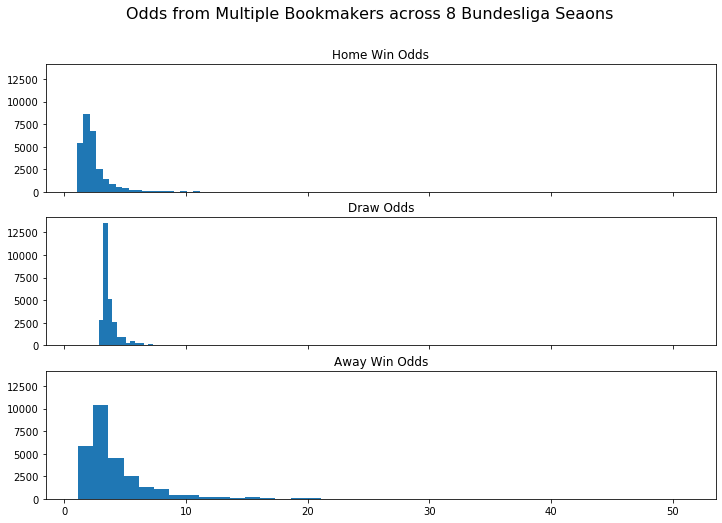

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(12,8), sharex=True, sharey=True)
ax1.set_title('Home Win Odds')
ax1.hist(all_odds_df[all_odds_df['bet_type'] == 'hwinOdds']['odds'], bins=40)
ax2.set_title('Draw Odds')
ax2.hist(all_odds_df[all_odds_df['bet_type'] == 'drawOdds']['odds'], bins=40)
ax3.set_title('Away Win Odds')
ax3.hist(all_odds_df[all_odds_df['bet_type'] == 'awinOdds']['odds'], bins=40)

plt.suptitle('Odds from Multiple Bookmakers across 8 Bundesliga Seaons', fontsize=16)

# plt.savefig(SAVED_IMAGES_DIR / 'eda-odds-bundesliga-multipl-bookies-multiple-seasons-histograms.PNG')
plt.show()

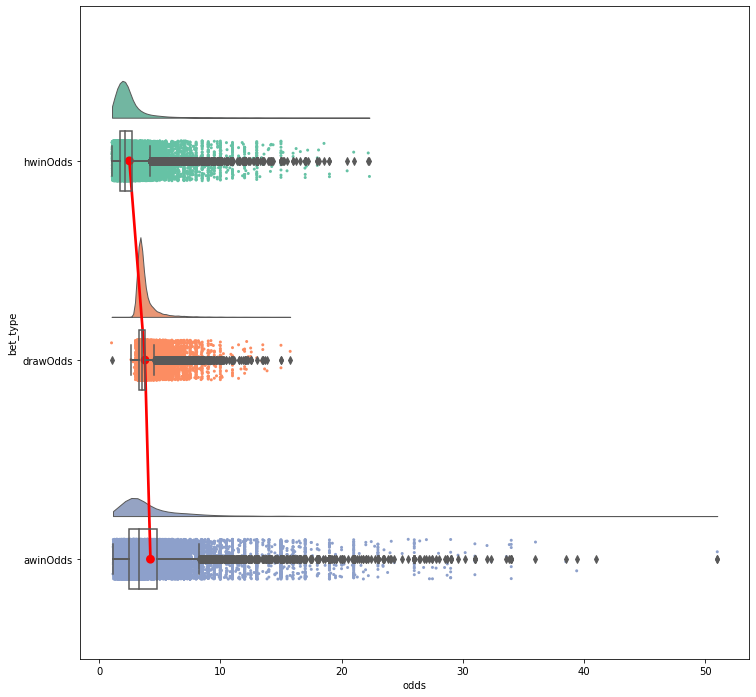

In [9]:
fig, ax = plt.subplots(figsize=(12,12))
ax = pt.RainCloud(x='bet_type', y='odds', data=all_odds_df, width_viol=0.8, width_box=0.3,
                  orient='h', pointplot=True,)

plt.savefig(SAVED_IMAGES_DIR / 'eda-odds-multiple-seasons-multiple-bookies-raincloudplot.PNG')
plt.suptitle('Bundesliga Odds from Multiple Sports Books across 8 Seasons')
plt.show();

In [10]:
all_odds_df = pd.concat([hwin_odds, draw_odds, awin_odds], axis=1).reset_index(drop=True)
desc = all_odds_df.describe()
desc.columns=['hwinOdds', 'drawOdds', 'awinOdds']
desc

,hwinOdds,drawOdds,awinOdds
count,27744.000000,27744.000000,27744.000000
mean,2.491304,3.778602,4.229857
std,1.496307,0.900539,3.055029
min,1.060000,1.020000,1.140000
25%,1.700000,3.300000,2.500000
50%,2.100000,3.500000,3.300000
75%,2.692500,3.800000,4.800000
max,22.300000,15.760000,51.000000


## Difference between Bookmakers

In [11]:
df = df_orig.copy()
df.head(2)

,season,date,h,a,h_ftGoals,a_ftGoals,result,awinClOddsPinn,awinOddsBbMax,awinOddsBbMean,awinOddsBet365,awinOddsBet365Indatabet,awinOddsBsa,awinOddsBwa,awinOddsGb,awinOddsIw,awinOddsLb,awinOddsPinn,awinOddsPinnIndatabet,awinOddsSb,awinOddsSj,awinOddsVc,awinOddsWh,drawClOddsPinn,drawOddsBbMax,drawOddsBbMean,drawOddsBet365,drawOddsBet365Indatabet,drawOddsBsa,drawOddsBwa,drawOddsGb,drawOddsIw,drawOddsLb,drawOddsPinn,drawOddsPinnIndatabet,drawOddsSb,drawOddsSj,drawOddsVc,drawOddsWh,hwinClOddsPinn,hwinOddsBbMax,hwinOddsBbMean,hwinOddsBet365,hwinOddsBet365Indatabet,hwinOddsBsa,hwinOddsBwa,hwinOddsGb,hwinOddsIw,hwinOddsLb,hwinOddsPinn,hwinOddsPinnIndatabet,hwinOddsSb,hwinOddsSj,hwinOddsVc,hwinOddsWh
0,2007-2008,2007-08-10,stuttgart,schalke,2.0,2.0,draw,NaN,3.2,2.92,2.87,3.0,2.88,2.85,2.9,2.8,3.0,NaN,NaN,2.85,3.0,2.8,NaN,NaN,3.3,3.18,3.25,3.25,3.2,3.20,3.2,3.1,3.2,NaN,NaN,3.25,3.20,3.25,NaN,NaN,2.55,2.30,2.37,2.1,2.2,2.30,2.35,2.3,2.1,NaN,NaN,2.25,2.20,2.25,NaN
1,2007-2008,2007-08-11,bayern-munich,hansa-rostock,3.0,0.0,hwin,NaN,21.0,13.40,19.00,10.0,11.00,12.25,13.0,11.0,11.0,NaN,NaN,11.00,15.0,13.0,NaN,NaN,6.8,5.89,6.00,5.50,5.5,6.75,6.0,5.2,5.0,NaN,NaN,5.75,5.75,6.00,NaN,NaN,1.20,1.18,1.16,1.2,1.2,1.15,1.20,1.2,1.2,NaN,NaN,1.20,1.17,1.14,NaN


In [12]:
hwin_cols = [col for col in df.columns if 'hwinOdds' in col]
draw_cols = [col for col in df.columns if 'drawOdds' in col]
awin_cols = [col for col in df.columns if 'awinOdds' in col]

df['min_hwinOdds'] = df[hwin_cols].min(axis=1, skipna=True)
df['max_hwinOdds'] = df[hwin_cols].max(axis=1, skipna=True)
df['diff_hwinOdds'] = df['max_hwinOdds'] - df['min_hwinOdds']

df['min_drawOdds'] = df[draw_cols].min(axis=1, skipna=True)
df['max_drawOdds'] = df[draw_cols].max(axis=1, skipna=True)
df['diff_drawOdds'] = df['max_drawOdds'] - df['min_drawOdds']

df['min_awinOdds'] = df[awin_cols].min(axis=1, skipna=True)
df['max_awinOdds'] = df[awin_cols].max(axis=1, skipna=True)
df['diff_awinOdds'] = df['max_awinOdds'] - df['min_awinOdds']
df.head(2)

,season,date,h,a,h_ftGoals,a_ftGoals,result,awinClOddsPinn,awinOddsBbMax,awinOddsBbMean,awinOddsBet365,awinOddsBet365Indatabet,awinOddsBsa,awinOddsBwa,awinOddsGb,awinOddsIw,awinOddsLb,awinOddsPinn,awinOddsPinnIndatabet,awinOddsSb,awinOddsSj,awinOddsVc,awinOddsWh,drawClOddsPinn,drawOddsBbMax,drawOddsBbMean,drawOddsBet365,drawOddsBet365Indatabet,drawOddsBsa,drawOddsBwa,drawOddsGb,drawOddsIw,drawOddsLb,drawOddsPinn,drawOddsPinnIndatabet,drawOddsSb,drawOddsSj,drawOddsVc,drawOddsWh,hwinClOddsPinn,hwinOddsBbMax,hwinOddsBbMean,hwinOddsBet365,hwinOddsBet365Indatabet,hwinOddsBsa,hwinOddsBwa,hwinOddsGb,hwinOddsIw,hwinOddsLb,hwinOddsPinn,hwinOddsPinnIndatabet,hwinOddsSb,hwinOddsSj,hwinOddsVc,hwinOddsWh,min_hwinOdds,max_hwinOdds,diff_hwinOdds,min_drawOdds,max_drawOdds,diff_drawOdds,min_awinOdds,max_awinOdds,diff_awinOdds
0,2007-2008,2007-08-10,stuttgart,schalke,2.0,2.0,draw,NaN,3.2,2.92,2.87,3.0,2.88,2.85,2.9,2.8,3.0,NaN,NaN,2.85,3.0,2.8,NaN,NaN,3.3,3.18,3.25,3.25,3.2,3.20,3.2,3.1,3.2,NaN,NaN,3.25,3.20,3.25,NaN,NaN,2.55,2.30,2.37,2.1,2.2,2.30,2.35,2.3,2.1,NaN,NaN,2.25,2.20,2.25,NaN,2.10,2.55,0.45,3.1,3.3,0.2,2.8,3.2,0.4
1,2007-2008,2007-08-11,bayern-munich,hansa-rostock,3.0,0.0,hwin,NaN,21.0,13.40,19.00,10.0,11.00,12.25,13.0,11.0,11.0,NaN,NaN,11.00,15.0,13.0,NaN,NaN,6.8,5.89,6.00,5.50,5.5,6.75,6.0,5.2,5.0,NaN,NaN,5.75,5.75,6.00,NaN,NaN,1.20,1.18,1.16,1.2,1.2,1.15,1.20,1.2,1.2,NaN,NaN,1.20,1.17,1.14,NaN,1.14,1.20,0.06,5.0,6.8,1.8,10.0,21.0,11.0


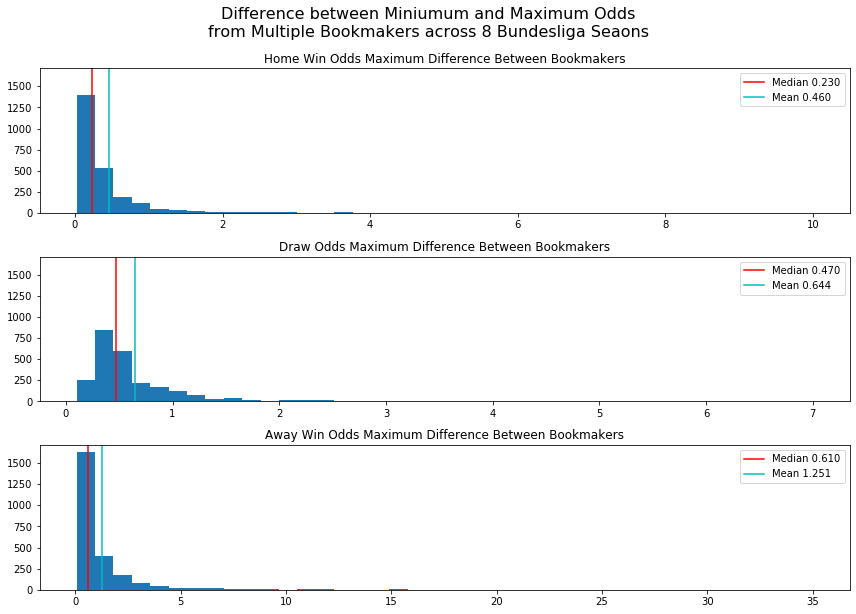

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(12,8), sharey=True)
ax1.set_title('Home Win Odds Maximum Difference Between Bookmakers')
ax1.hist(df['diff_hwinOdds'], bins=40)
ax1.axvline(df['diff_hwinOdds'].median(), c='r', label=f"Median {df['diff_hwinOdds'].median():.3f}")
ax1.axvline(df['diff_hwinOdds'].mean(), c='c', label=f"Mean {df['diff_hwinOdds'].mean():.3f}")
ax1.legend()

ax2.set_title('Draw Odds Maximum Difference Between Bookmakers')
ax2.hist(df['diff_drawOdds'], bins=40)
ax2.axvline(df['diff_drawOdds'].median(), c='r', label=f"Median {df['diff_drawOdds'].median():.3f}")
ax2.axvline(df['diff_drawOdds'].mean(), c='c', label=f"Mean {df['diff_drawOdds'].mean():.3f}")
ax2.legend()

ax3.set_title('Away Win Odds Maximum Difference Between Bookmakers')
ax3.hist(df['diff_awinOdds'], bins=40)
ax3.axvline(df['diff_awinOdds'].median(), c='r', label=f"Median {df['diff_awinOdds'].median():.3f}")
ax3.axvline(df['diff_awinOdds'].mean(), c='c', label=f"Mean {df['diff_awinOdds'].mean():.3f}")
ax3.legend()

plt.suptitle('Difference between Miniumum and Maximum Odds\nfrom Multiple Bookmakers across 8 Bundesliga Seaons',
             fontsize=16, y=1.06)
plt.tight_layout()

# plt.savefig(SAVED_IMAGES_DIR / 'eda-max-difference-in-same-game-odds-bundesliga-multiple-bookies-multiple-seasons-histograms.PNG')
plt.show()

In [14]:
df[['diff_hwinOdds', 'diff_drawOdds', 'diff_awinOdds']].describe()

,diff_hwinOdds,diff_drawOdds,diff_awinOdds
count,2448.000000,2448.000000,2448.000000
mean,0.459654,0.644232,1.251377
std,0.783265,0.578533,2.201528
min,0.020000,0.100000,0.050000
25%,0.140000,0.350000,0.310000
50%,0.230000,0.470000,0.610000
75%,0.440000,0.710000,1.230000
max,10.000000,7.000000,35.000000


## Comments

+ This data is for multiple bookmakers over 3 seasons
+ There is a hard limit on the lower end of the home win odds(1.08) and away win odds (1.33)
+ Looking at the raincloud plot, it seems like there is almost a hard limit on the lower end of the draw odds (>2.62)
+ The draw odds are far more tightly distributed than the other odds
+ The awin win odds have a very long tail compared to the other odds The maximum is 29 compared to 10.8 for home win odds, and 10 for draw odds